Assignment 7: Neural Networks using Keras and Tensorflow Please see the associated document for questions

If you have problems with Keras and Tensorflow on your local installation please make sure they are updated. On Google Colab this notebook runs.

In [57]:
!pip install tensorflow --quiet

In [58]:
# imports
from __future__ import print_function
import keras
from keras import utils as np_utils
import tensorflow
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
import tensorflow as tf
from matplotlib import pyplot as plt
import numpy as np



In [3]:
# Hyper-parameters data-loading and formatting

batch_size = 128
num_classes = 10
epochs = 40

img_rows, img_cols = 28, 28

(x_train, lbl_train), (x_test, lbl_test) = mnist.load_data()

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

**Preprocessing**

In [4]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_train /= 255
x_test /= 255

display(lbl_train)

y_train = keras.utils.np_utils.to_categorical(lbl_train, num_classes)
y_test = keras.utils.np_utils.to_categorical(lbl_test, num_classes)


array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

#### 2C

Epoch 1/10
469/469 [==============================] - 2s 4ms/step - loss: 0.4032 - accuracy: 0.8749 - val_loss: 0.1858 - val_accuracy: 0.9435
Epoch 2/10
469/469 [==============================] - 2s 4ms/step - loss: 0.1597 - accuracy: 0.9513 - val_loss: 0.1450 - val_accuracy: 0.9526
Epoch 3/10
469/469 [==============================] - 2s 4ms/step - loss: 0.1226 - accuracy: 0.9617 - val_loss: 0.1212 - val_accuracy: 0.9636
Epoch 4/10
469/469 [==============================] - 2s 4ms/step - loss: 0.1010 - accuracy: 0.9690 - val_loss: 0.1063 - val_accuracy: 0.9676
Epoch 5/10
469/469 [==============================] - 2s 4ms/step - loss: 0.0857 - accuracy: 0.9730 - val_loss: 0.1111 - val_accuracy: 0.9645
Epoch 6/10
469/469 [==============================] - 2s 4ms/step - loss: 0.0770 - accuracy: 0.9757 - val_loss: 0.0925 - val_accuracy: 0.9714
Epoch 7/10
469/469 [==============================] - 2s 4ms/step - loss: 0.0688 - accuracy: 0.9778 - val_loss: 0.1112 - val_accuracy: 0.9653
Epoch 

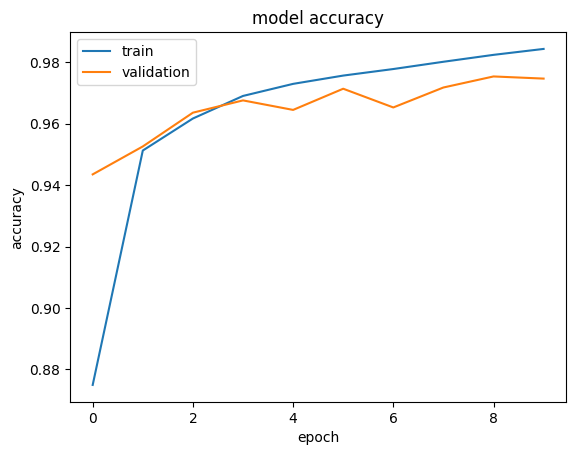

In [60]:
# Create and compile Model with applicable layers

model = Sequential()
model.add(Conv2D(filters=2, kernel_size=(3,3), input_shape=(28,28,1), activation='relu'))
model.add(Flatten())   
model.add(Dense(64, activation = 'relu'))
model.add(Dense(64, activation = 'relu'))
model.add(Dense(num_classes, activation='softmax'))
model.compile(loss=keras.losses.categorical_crossentropy,
        optimizer=tensorflow.keras.optimizers.SGD(learning_rate = 0.1),
        metrics=['accuracy'],)


# Fit the model using the training data as well as validate it with the test data
fit_info = model.fit(x_train, y_train,
        batch_size=batch_size,
        epochs=10,
        verbose=1,
        validation_data=(x_test, y_test))

# Create a plot that shows the accuracy as well as the validation accuracy at each epoch in the model
plt.plot(fit_info.history['accuracy'])
plt.plot(fit_info.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'])
plt.show()


#### 2D

In [62]:
# list with our chosen regularization factors
regfactors: list[float] = [0.000001, 0.000123,  0.00001, 0.0001,  0.001]

# The function takes a regularization value, creates and trains the model and then returns the validation accuracy
def trainwithfactor(regvalue: float) -> float:
        ## Define model ##
        model = Sequential()
        model.add(Flatten())
        model.add(Dense(500, activation = 'relu', kernel_regularizer=keras.regularizers.L2(regvalue)))
        model.add(Dense(300, activation = 'relu', kernel_regularizer=keras.regularizers.L2(regvalue)))
        model.add(Dense(num_classes, activation='softmax'))

        model.compile(loss=keras.losses.categorical_crossentropy,
                optimizer=tensorflow.keras.optimizers.SGD(learning_rate = 0.1),
                metrics=['accuracy'],)

        model.fit(x_train, y_train,
                batch_size=batch_size,
                epochs=epochs,
                verbose=0,
                validation_data=(x_test, y_test))
        score = model.evaluate(x_test, y_test, verbose=0)
        return score[1]

# Array to save all results in format of [[validation accuracy]]
results = []

for factor in regfactors:
        res: list[float] = []
        for i in range(3):
                print(i, "in", regfactors.index(factor)) # Simple print to keep track of how far the loop has come
                res.append(trainwithfactor(factor))
        results.append(res)


0 in 0
1 in 0
2 in 0
0 in 1
1 in 1
2 in 1
0 in 2
1 in 2
2 in 2
0 in 3
1 in 3
2 in 3
0 in 4
1 in 4
2 in 4


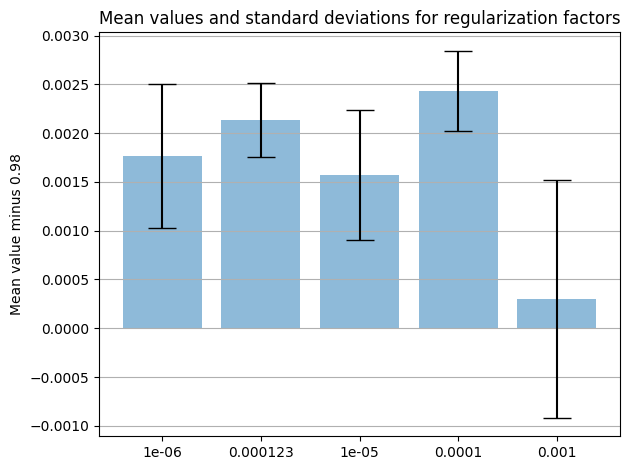

In [61]:
# calculate the standard deviation for each tuple of 3 validation accuracies for each regularization factors 
resstds = [np.std(tup) for tup in results] 
# calculate the mean validation score for each regularization factors. -0.98 is applied after mean function and helps to make the graph more readable
resmeans = [np.mean(tup)-0.98 for tup in results] 

# Create the grapth and show it
fig, ax = plt.subplots()
ax.bar([1,2,3,4,5], resmeans, yerr=resstds, align='center', alpha=0.5, ecolor='black', capsize=10)
ax.set_ylabel('Mean value minus 0.98')
ax.set_xticks([1,2,3,4,5])
ax.set_xticklabels(regfactors)
ax.set_title('Mean values and standard deviations for regularization factors')
ax.yaxis.grid(True)
plt.tight_layout()
plt.show()

#### 3A

In [63]:
# Create the model with the convolutional layer
model = Sequential()
model.add(Conv2D(filters=2, kernel_size=(3,3), input_shape=(28,28,1), activation='relu'))
model.add(Flatten())   
model.add(Dense(800, activation = 'relu', kernel_regularizer=keras.regularizers.L2(0.0001)))
model.add(Dense(800, activation = 'relu', kernel_regularizer=keras.regularizers.L2(0.0001)))
model.add(Dense(num_classes, activation='softmax'))
model.compile(loss=keras.losses.categorical_crossentropy,
        optimizer=tensorflow.keras.optimizers.SGD(learning_rate = 0.1),
        metrics=['accuracy'],)

# Fit the model to the training data to be able to benchmark it
fit_info = model.fit(x_train, y_train,
        batch_size=batch_size,
        epochs=10,
        verbose=1,
        validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
model.summary()
print('Test loss: {}, Test accuracy {}'.format(score[0], score[1]))

Epoch 1/10
469/469 [==============================] - 5s 11ms/step - loss: 0.4834 - accuracy: 0.9088 - val_loss: 0.2945 - val_accuracy: 0.9646
Epoch 2/10
469/469 [==============================] - 5s 10ms/step - loss: 0.2757 - accuracy: 0.9697 - val_loss: 0.2722 - val_accuracy: 0.9688
Epoch 3/10
469/469 [==============================] - 5s 10ms/step - loss: 0.2438 - accuracy: 0.9787 - val_loss: 0.2817 - val_accuracy: 0.9664
Epoch 4/10
469/469 [==============================] - 4s 9ms/step - loss: 0.2228 - accuracy: 0.9845 - val_loss: 0.2424 - val_accuracy: 0.9778
Epoch 5/10
469/469 [==============================] - 4s 9ms/step - loss: 0.2087 - accuracy: 0.9882 - val_loss: 0.2277 - val_accuracy: 0.9809
Epoch 6/10
469/469 [==============================] - 4s 9ms/step - loss: 0.1963 - accuracy: 0.9914 - val_loss: 0.2282 - val_accuracy: 0.9803
Epoch 7/10
469/469 [==============================] - 5s 10ms/step - loss: 0.1879 - accuracy: 0.9931 - val_loss: 0.2276 - val_accuracy: 0.9802
Ep

### Question 4) Auto-Encoder for denoising


In [8]:
import numpy as np
def salt_and_pepper(input, noise_level=0.5):
    """
    This applies salt and pepper noise to the input tensor - randomly setting bits to 1 or 0.
    Parameters
    ----------
    input : tensor
        The tensor to apply salt and pepper noise to.
    noise_level : float
        The amount of salt and pepper noise to add.
    Returns
    -------
    tensor
        Tensor with salt and pepper noise applied.
    """
    # salt and pepper noise
    a = np.random.binomial(size=input.shape, n=1, p=(1 - noise_level))
    b = np.random.binomial(size=input.shape, n=1, p=0.5)
    c = (a==0) * b
    return input * a + c

print(x_train.shape)
#data preparation
flattened_x_train = x_train.reshape(-1,784)
flattened_x_train_seasoned = salt_and_pepper(flattened_x_train, noise_level=0.1)

flattened_x_test = x_test.reshape(-1,784)
flattened_x_test_seasoned = salt_and_pepper(flattened_x_test, noise_level=0.1)


(60000, 28, 28, 1)


In [18]:

latent_dim = 96  

input_image = keras.Input(shape=(784,))
encoded = Dense(128, activation='relu')(input_image)
encoded = Dense(latent_dim, activation='relu')(encoded)
decoded = Dense(128, activation='relu')(encoded)
decoded = Dense(784, activation='sigmoid')(decoded)

autoencoder = keras.Model(input_image, decoded)

encoder_only = keras.Model(input_image, encoded)

encoded_input = keras.Input(shape=(latent_dim,))
decoder_layer = Sequential(autoencoder.layers[-2:])
decoder = keras.Model(encoded_input, decoder_layer(encoded_input))

autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

KerasTensor(type_spec=TensorSpec(shape=(None, 96), dtype=tf.float32, name=None), name='dense_8/Relu:0', description="created by layer 'dense_8'")


In [14]:
# a helper function to help retrain the autoencoder when the seasoned arrays have changed.
def aefit():
    autoencoder.fit(flattened_x_train_seasoned, flattened_x_train,
                epochs=32,
                batch_size=64,
                shuffle=True,
                verbose=0,
                validation_data=(flattened_x_test_seasoned, flattened_x_test))

#### 4B

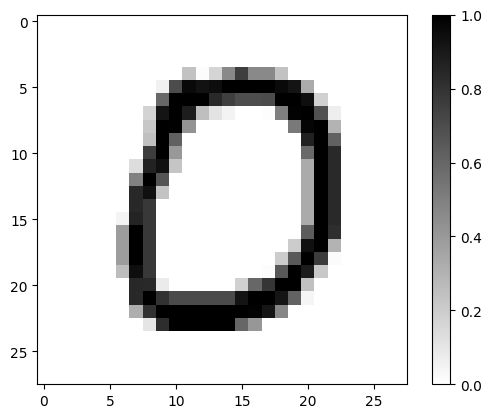

In [19]:
index = 10 # index to keep track of which image from the testing set we are looking at and printing
plt.figure()
plt.imshow(x_test[index], cmap=plt.cm.binary)
plt.colorbar()
plt.show()

noise = 0.1
# for each noise level from 0.1 to 0.9 with 0.2 steps, print the image defined by the index in order to generate the data for the assignment question
for _ in range(5):
    flattened_x_train_seasoned = salt_and_pepper(flattened_x_train, noise)
    flattened_x_test_seasoned = salt_and_pepper(flattened_x_test, noise)
    aefit()
    out = autoencoder.predict([(flattened_x_test_seasoned)])
    plt.figure()
    plt.imshow(flattened_x_test_seasoned[index].reshape(28,28,1), cmap=plt.cm.binary)
    plt.savefig(f"noised_{noise}.png")
    plt.colorbar()
    plt.show()
    plt.figure()
    plt.imshow(out[index].reshape(28,28,1), cmap=plt.cm.binary)
    plt.savefig(f"denoised_{noise}.png")
    plt.colorbar()
    plt.show()
    
    noise += 0.2

In [65]:
# Best performant model from our earlier experimentation and will be used to benchmark seasoned and denoised images
bpmodel = Sequential()
bpmodel.add(Flatten())
bpmodel.add(Dense(500, activation = 'relu', kernel_regularizer=keras.regularizers.L2(0.0001)))
bpmodel.add(Dense(300, activation = 'relu', kernel_regularizer=keras.regularizers.L2(0.0001)))
bpmodel.add(Dense(num_classes, activation='softmax'))

bpmodel.compile(loss=keras.losses.categorical_crossentropy,
        optimizer=tensorflow.keras.optimizers.SGD(learning_rate = 0.1),
        metrics=['accuracy'],)

bpmodel.fit(x_train, y_train,
        batch_size=batch_size,
        epochs=epochs,
        verbose=0,
        validation_data=(x_test, y_test))



In [66]:
# List to keep the accuracy values from seasoned image- and denoised image classification
seasonedresults = []
denoisedresults = []
noises = []

noise = 0.1
# goes through noise level 0.1 to 0.9 and saves the accuracy data
for _ in range(9):
    print(noise)
    flattened_x_train_seasoned = salt_and_pepper(flattened_x_train, noise)
    flattened_x_test_seasoned = salt_and_pepper(flattened_x_test, noise)
    aefit()
    denoised = autoencoder.predict([(flattened_x_test_seasoned)])
    score = bpmodel.evaluate(flattened_x_test_seasoned.reshape(10000, 28, 28, 1), y_test, verbose=0)
    seasonedresults.append(score[1])
    score = bpmodel.evaluate(denoised.reshape(10000, 28, 28, 1), y_test, verbose=0)
    denoisedresults.append(score[1])

    noises.append(noise)
    noise += 0.1


0.1


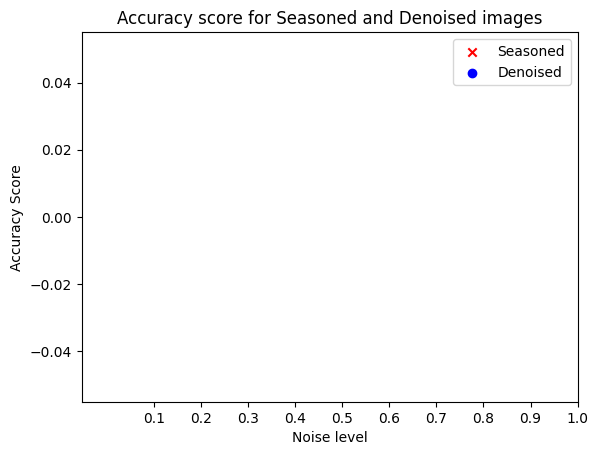

In [ ]:
# Creates a scatter plot with the accuracies determined earlier
plt.scatter(noises, seasonedresults,  marker='x', c='red')
plt.scatter(noises, denoisedresults,  marker='o', c='blue')
plt.xticks([x/10 for x in range(1,11)])
plt.title('Accuracy score for Seasoned and Denoised images')
plt.ylabel('Accuracy Score')
plt.xlabel('Noise level')
plt.legend(['Seasoned', 'Denoised'])